<img src =  'https://camo.githubusercontent.com/7fa5735ef58c4e7b88d448f595d089c93f9bee00/68747470733a2f2f7777772e696e736169642e636f2f77702d636f6e74656e742f75706c6f6164732f323031392f30392f6c6f676f32782e706e67' />

# Letter Recognition - DataSet

### Presented by: *Vishweshwar Satpute*

# Table of Content

1. [Description of the Dataset](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Installing & Importing Libraries](#section3)<br>
4. [Data Preprocessing](#section4)<br>
5. [EDA](#section5)<br>
6. [Preparing x and y](#section6)<br>
7. [Machine Learning Modelling](#section7)<br>
    7.1 [SVM](#section701)<br>
    7.2 [Random Forest](#section702)<br>
    7.3 [Decision Tree](#section703)<br>
    7.4 [KNN](#section704)<br>
8. [Conclusion](#section8)<br>

<a id=section1></a>
## 1. Description of the Dataset

  
letter :  capital letter (26 values from A to Z) 

x-box :   horizontal position of box 

y-box :   vertical position of box 

width :   width of box 

high :    height of box 

onpix :   total # on pixels 

x-bar :   mean x of on pixels in box 

y-bar :   mean y of on pixels in box 

x2bar :   mean x variance 

y2bar :   mean y variance 

xybar :   mean x y correlation 

x2ybr :   mean of x * x * y 

xy2br :   mean of x * y * y 

x-ege :   mean edge count left to right 

xegvy :   correlation of x-ege with y 

y-ege :   mean edge count bottom to top 

yegvx :   correlation of y-ege with x 

<a id=section2></a>
## 2. Problem Statement

Applying Machine Learning Algorithm to identify the uppercase alphabets.

<a id=section3></a>
## 3. Installing & Importing Libraries

In [28]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [29]:
import numpy as np                                                
import pandas as pd 
from IPython.display import display

import seaborn as sns                                              
sns.set()
import matplotlib.pyplot as plt
plt.style.use('bmh') # for better plots
%matplotlib inline

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from yellowbrick.classifier import ConfusionMatrix

from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

<a id=section4></a>
## 4. Data Preprocessing

In [31]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_train.csv")
data

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,R,4,6,6,4,6,8,6,7,3,7,5,7,4,7,7,7,15996
15996,G,8,14,7,8,4,8,4,5,3,8,4,5,4,7,5,8,15997
15997,E,4,7,5,5,3,7,7,2,9,11,6,9,2,8,5,8,15998
15998,C,2,1,3,2,1,6,8,7,7,8,8,13,1,9,4,10,15999


In [32]:
data.drop(columns='id', inplace= True)


In [33]:
data[data.duplicated(keep=False)]

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
21,S,3,2,3,3,2,8,8,7,5,7,5,7,2,8,9,8
36,P,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8
50,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
59,N,3,3,3,5,2,7,7,13,2,5,6,8,5,8,0,8
66,E,2,3,3,2,2,7,7,5,7,7,6,8,2,8,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,E,3,7,3,5,2,3,8,6,10,7,6,14,0,8,7,8
15907,B,1,0,2,1,1,7,7,7,5,6,6,7,1,8,7,9
15976,T,2,3,3,4,1,8,14,0,6,6,11,8,0,8,0,8
15981,I,1,1,1,2,1,7,7,1,7,7,6,8,0,8,2,8


In [34]:
data.shape

(16000, 17)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  16000 non-null  object
 1   x-box   16000 non-null  int64 
 2   y-box   16000 non-null  int64 
 3   width   16000 non-null  int64 
 4   high    16000 non-null  int64 
 5   onpix   16000 non-null  int64 
 6   x-bar   16000 non-null  int64 
 7   y-bar   16000 non-null  int64 
 8   x2bar   16000 non-null  int64 
 9   y2bar   16000 non-null  int64 
 10  xybar   16000 non-null  int64 
 11  x2ybr   16000 non-null  int64 
 12  xy2br   16000 non-null  int64 
 13  x-ege   16000 non-null  int64 
 14  xegvy   16000 non-null  int64 
 15  y-ege   16000 non-null  int64 
 16  yegvx   16000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.1+ MB


In [36]:
data.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,4.020313,7.029063,5.117500,5.366000,3.500625,6.892688,7.512000,4.627562,5.170187,8.286625,6.471063,7.927062,3.049313,8.343937,3.682313,7.796125
std,1.908436,3.303998,2.003202,2.262656,2.192613,2.029576,2.333494,2.711330,2.384917,2.485706,2.641917,2.071988,2.342829,1.550055,2.571245,1.603464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [37]:
print('Checking for Null Values \n{}'.format(data.isnull().sum()))


Checking for Null Values 
letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64


Number of instances: 16,000
Number of attributes: 17 (letter category and 16 numeric features)
Attribute characteristics: Integer
Associated Tasks: Classification
Missing Attribute Values: None

In [38]:
print('Different types of Letters \n\n{}'.format(data.letter.unique()))

Different types of Letters 

['I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'T' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


In [39]:
order = list(np.sort(data['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<a id=section5></a>
## 5. EDA

<Figure size 1080x720 with 0 Axes>

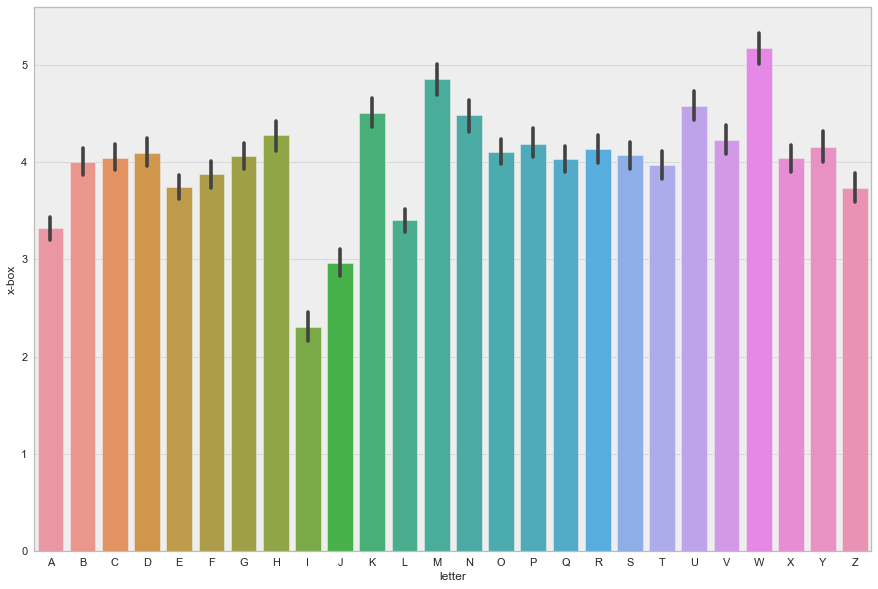

In [40]:
plt.figure(figsize=(15, 10))
sns.barplot(x='letter', y='x-box', 
            data=data, 
            order=order)

In [41]:
data_mean = data.groupby('letter').mean()
data_mean.head(27)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
letter,,,,,,,,,,,,,,,,
A,3.320695,6.917852,5.110585,5.146919,2.963665,8.832543,3.612954,2.715640,2.026856,7.793049,2.336493,8.477093,2.763033,6.298578,2.856240,7.472354
B,4.003175,7.017460,5.115873,5.200000,4.633333,7.680952,7.052381,5.388889,5.569841,7.931746,5.514286,6.668254,3.152381,7.934921,6.668254,9.104762
C,4.047138,7.074074,4.671717,5.277778,2.740741,5.422559,7.676768,5.919192,7.161616,8.907407,7.562290,11.867003,1.944444,8.900673,4.062290,8.523569
D,4.098746,7.429467,5.239812,5.380878,4.095611,7.537618,6.786834,5.921630,6.514107,8.147335,5.070533,5.757053,3.402821,7.810345,3.992163,7.639498
E,3.743506,6.943182,4.759740,5.176948,3.659091,5.983766,7.344156,4.233766,7.589286,8.545455,6.256494,10.326299,2.115260,8.300325,6.022727,8.461039
F,3.874598,7.123794,4.905145,5.271704,3.202572,4.901929,10.461415,3.508039,4.893891,11.218650,7.839228,5.736334,1.726688,9.114148,3.390675,6.697749
G,4.067323,6.981938,4.968801,5.241379,3.541872,6.857143,6.561576,5.934319,5.318555,7.435140,6.146141,9.556650,2.840722,8.399015,5.162562,9.200328
H,4.277873,6.814751,5.713551,5.173242,4.219554,7.334477,7.317324,6.792453,4.212693,8.013722,5.914237,7.797599,3.826758,8.049743,3.078902,7.866209
I,2.300000,7.040678,2.671186,5.267797,1.862712,7.467797,7.037288,1.918644,5.964407,9.506780,5.805085,7.618644,0.550847,8.076271,2.155932,7.928814


<Figure size 1080x720 with 0 Axes>

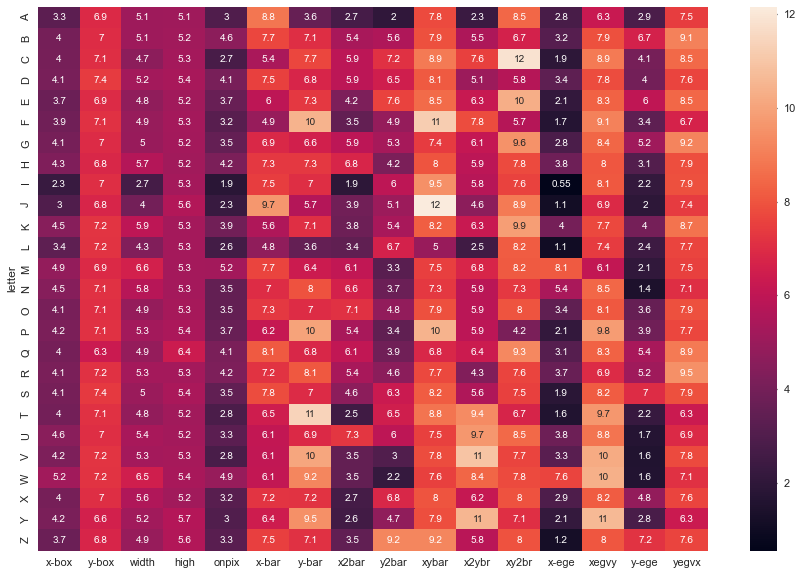

In [42]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_mean,annot=True)

<a id=section6></a>
## 6. Preparing x and y

In [43]:
x = data.drop('letter' , axis = 1)
print("")
print("_______________________________Preparing Explanatory Variables____________________________________")
x.head(5)
x.shape


_______________________________Preparing Explanatory Variables____________________________________


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


(16000, 16)

In [44]:
y = data['letter']
print("")
print("_______________________________Preparing Target Variables____________________________________")
y.head(5)
y.shape


_______________________________Preparing Target Variables____________________________________


0    I
1    D
2    N
3    G
4    S
Name: letter, dtype: object

(16000,)

<a id=section601></a>
### 6.1 Train Test split

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print('Shape of x Training Data is {}\n'.format(x_train.shape))
print('Shape of x Test Data is {}\n'.format(x_test.shape))
print('Shape of y Training Data is {}\n'.format(y_train.shape))
print('Shape of y Test Data is {}\n'.format(y_test.shape))

Shape of x Training Data is (12800, 16)

Shape of x Test Data is (3200, 16)

Shape of y Training Data is (12800,)

Shape of y Test Data is (3200,)



<a id=section7></a>
## 7. Machine Learning Modelling

<a id=section701></a>
### 71. SVM

In [46]:
from sklearn.svm import SVC

# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

# predict
y_pred = model_linear.predict(x_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
print(y_pred)

['D' 'G' 'K' ... 'I' 'W' 'K']


In [48]:
# confusion matrix and accuracy 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# accuracy

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8603125 

[[110   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   1
    0   0   0   1   0   0   0   0]
 [  2 120   0   2   0   0   1   3   2   0   0   0   0   1   0   1   0   3
    1   0   0   0   0   0   0   0]
 [  0   0 103   0   3   0   4   0   0   0   6   2   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  1   3   0 107   0   0   0   0   0   1   0   0   0   4   1   0   0   1
    0   1   1   0   0   0   0   0]
 [  0   0   1   0 115   1   7   0   0   0   1   3   0   0   0   0   2   0
    3   0   0   0   0   1   0   2]
 [  0   2   1   1   2 111   0   0   0   1   0   0   0   0   0   0   0   0
    3   4   0   0   0   0   1   1]
 [  0   0   2   3   1   1  98   3   0   1   2   0   0   0   0   0   5   0
    1   0   0   3   0   0   0   0]
 [  0   4   3  10   0   3   0  81   0   0   4   0   0   1   0   0   1   8
    0   1   0   0   0   1   0   0]
 [  0   1   0   3   0   4   0   0 109   2   0   0   0   0   0   0   0   0
    2   0   0   0   0   2   1   

In [49]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(x_train, y_train)

# predict
y_pred = non_linear_model.predict(x_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9196875 

[[111   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   1
    0   0   1   0   0   0   0   0]
 [  1 124   0   4   0   0   0   1   0   0   0   0   0   0   0   0   0   3
    3   0   0   0   0   0   0   0]
 [  0   0 111   0   2   0   3   0   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [  1   0   0 115   0   0   0   0   0   0   0   0   0   3   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   2   0   0 121   0   7   0   0   0   0   0   0   0   0   0   2   1
    0   0   0   0   0   2   0   1]
 [  0   0   0   1   1 121   0   0   0   0   0   0   0   0   0   0   0   0
    2   2   0   0   0   0   0   0]
 [  1   1   1   3   1   0 109   1   0   0   0   0   0   0   1   0   2   0
    0   0   0   0   0   0   0   0]
 [  0   4   0   6   0   1   1  94   0   0   1   0   0   1   1   0   0   7
    0   0   0   1   0   0   0   0]
 [  0   0   0   3   0   5   0   0 110   2   0   0   0   0   0   1   0   0
    3   0   0   0   0   0   0   

Conclusion

The accuracy achieved using a non-linear kernel (0.95) is mush higher than that of a linear one (0.85). We can conclude that the problem is highly non-linear in nature.

<a id=section702></a>
### 7.2 Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 330)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=330,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9571875


<a id=section703></a>
### 7.3 Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000230252FCDC8>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000002302536FE48>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)

0.8603125

Accuracy:  0.8603125
[[104   0   1   0   0   0   0   1   0   0   0   1   3   2   0   0   0   1
    0   0   0   0   1   0   0   0]
 [  0 112   1   1   3   0   0   5   0   0   2   0   1   0   1   0   0   4
    0   0   0   3   0   1   1   1]
 [  0   0 101   0   3   1   6   0   0   0   2   2   0   0   2   0   0   0
    0   1   0   1   0   0   0   0]
 [  0   0   0 103   0   0   2   1   0   0   0   0   0   3   4   0   0   2
    1   1   3   0   0   0   0   0]
 [  0   1   1   0 106   0   5   0   0   0   1   2   0   0   1   3   0   2
    3   3   0   0   0   5   0   3]
 [  0   2   0   0   1 107   0   0   2   0   0   0   0   0   0   1   0   4
    1   6   0   0   0   0   2   1]
 [  1   0   1   3   0   1 106   1   0   0   0   1   0   0   1   1   1   0
    0   0   0   3   0   0   0   0]
 [  1   3   0   3   0   2   0  84   0   0   7   0   0   0   1   1   0   7
    1   1   4   0   0   2   0   0]
 [  0   1   0   0   2   3   0   0 111   2   1   0   0   0   0   2   0   0
    1   0   0   0   0   0   0   1

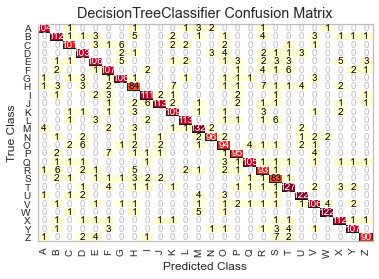

In [54]:

dec_tree = DecisionTreeClassifier()

cm = ConfusionMatrix(dec_tree, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

# train the model using the training sets
cm.fit(x_train, y_train)

cm.score(x_test, y_test)

# predict the responses for test dataset
predictions = cm.predict(x_test)

# accuracy classification score
print("Accuracy: ", accuracy_score(y_test, predictions))

# compute confusion matrix
print(metrics.confusion_matrix(y_test, predictions))

# text report showing the main classification metrics
print(classification_report(y_test, predictions))

cm.poof()

<a id=section704></a>
### 7.4 KNN

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000023025292C88>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x00000230397C5788>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)

0.949375

Accuracy:  0.949375
[[112   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 127   0   1   1   1   0   3   0   0   0   0   0   0   0   0   0   1
    0   0   0   2   0   0   0   0]
 [  0   0 117   0   0   0   1   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 119   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   1   0 126   1   3   0   0   0   1   0   0   0   0   0   0   0
    0   1   0   0   0   1   0   1]
 [  0   0   0   1   0 119   0   0   0   0   0   0   0   0   0   4   1   0
    0   2   0   0   0   0   0   0]
 [  0   3   0   3   3   1 109   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   3   0   5   0   0   0 105   0   0   2   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0 119   3   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]

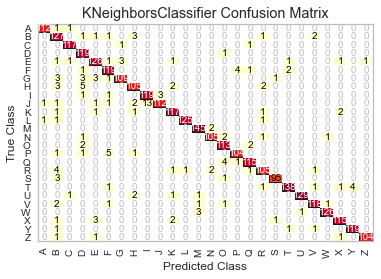

In [56]:
# Create KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)

cm = ConfusionMatrix(knn, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

# train the model using the training sets
cm.fit(x_train, y_train)

cm.score(x_test, y_test)

# predict the responses for test dataset
predictions = cm.predict(x_test)

# accuracy classification score
print("Accuracy: ", accuracy_score(y_test, predictions))

# compute confusion matrix
print(confusion_matrix(y_test, predictions))

# text report showing the main classification metrics
print(classification_report(y_test, predictions, digits=5))

cm.poof()

<a id=section8></a>
## 8. Conclusion

Looking at the output of the different model, Random Forest performed better when compared to the SVM, Decision Tree & KNN.
